**(a) Write a code from the scratch that learns unigram and bigram models on the training data as Python dictionaries. Report the perplexity of your unigram and bigram models on the both training data and test data.**

In [1]:
#Importing libraries
import nltk
nltk.download('brown')
from nltk.corpus import brown
import itertools
import string
import math
import pandas as pd
import random
import collections

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [ ]:
brown.categories()

In [3]:
len(brown.sents())

57340

Splitting the dataset

In [25]:
dataset = [sentence for sentence in brown.sents()]
#Splitting the data
d_train = dataset[0:40138]
d_vald = dataset[40139:45873]
d_test = dataset[45874:]

In [26]:
print(len(d_train))
print(len(d_vald))
print(len(d_test))

40138
5734
11466


In [27]:
# Total no.of tokens in training data for unigram calculation
d_t = list(itertools.chain.from_iterable(d_train))
total_dtrain = len(d_t)
print("Total corpus for training data : ", total_dtrain)

Total corpus for training data :  890689


Preprocessing the data

In [30]:
# Function to remove punctuations and empty strings and make it to lowercase
def preprocess_data(sents):
    for i in range(len(sents)):
        #print(sents[i])
        sents[i] = [''.join(c for c in s if c not in string.punctuation) for s in sents[i]] # remove punctuations
        sents[i] = [s for s in sents[i] if s] # removes empty strings
        sents[i] = [word.lower() for word in sents[i]] # lower case
        sents[i] += ['</s>', '</s>'] # Append </s> at the end of each sentence in the corpus
        sents[i].insert(0, '<s>')  # Append <s> at the beginning of each sentence in the corpus
        sents[i].insert(0, '<s>')  # Append <s> at the beginning of each sentence in the corpus
    print("No of sentences in Corpus: "+str(len(sents)))
    return sents

In [31]:
d_train = preprocess_data(d_train)

No of sentences in Corpus: 40138


Total Vocabulary Size

In [32]:
# Function to calucate the unique set of words
def vocab(dataset):
    ds = set(itertools.chain.from_iterable(dataset))
    # remove <s> and </s> from the vocabulary of the dataset
    ds.remove('<s>')
    ds.remove('</s>')
    ds = list(ds)
    ds.append('<s>')
    ds.append('</s>')
    return ds

dtrn_vocab = vocab(d_train)

In [33]:
dtrn_vocab_size = len(dtrn_vocab)
print("Vocabulary Size of training data: ", dtrn_vocab_size)

Vocabulary Size of training data:  42235


Frequency of unique words

In [34]:
def cal_unique_freq(dataset):
    bag_of_words = list(itertools.chain.from_iterable(dataset)) # change the nested list to one single list
    corpus_word_count = 0 # to get a count of words excluding start and stop symbols.
    count = {}
    for word in bag_of_words:
        if word in count :
            count[word] += 1
        else:
            count[word] = 1
        if word != '<s>' and word != '</s>':
             corpus_word_count +=1
            
    unique_word_count = len(count) #number of unique words in the corpus
    print("No of unique words in corpus : "+ str(unique_word_count))
    print("No of words in corpus: "+ str(corpus_word_count))
    return count

In [35]:
unigram_freq = cal_unique_freq(d_train)

No of unique words in corpus : 42235
No of words in corpus: 785353


In [ ]:
unigram_freq

Unigram Model based on total token and word frequencies

In [36]:
def cal_unigram_prob(word_freq, total_tokens):
  unigram = {}
  for w in word_freq:
    unigram[w] = word_freq[w] /total_tokens
  return unigram

In [ ]:
unigram_probabilities = cal_unigram_prob(unigram_freq, total_dtrain)
unigram_probabilities

Bigram Model

In [40]:
#Calculating the bigram frequencies of set of words
def cal_bigram_freq(lines):
    bigram_frequencies = dict()
    for sentence in lines:
        given_word = None
        for word in sentence:
            if given_word != None:
                bigram_frequencies[(given_word, word)] = bigram_frequencies.get((given_word, word),0) + 1
            given_word = word    
    return bigram_frequencies

In [ ]:
bigram_freq = cal_bigram_freq(d_train)
bigram_freq

In [43]:
# Calculating bigram probability
def cal_bigram_prob(bigram_freq, unique_freq, denom = 0, add_l=False):
    bigram_prob = dict() 
    for key in bigram_freq:
        numerator = bigram_freq.get(key)
        if add_l:
          denominator = unique_freq.get(key[0]) + denom # If smoothing then unigram's freq of given word + no.of unique words
        else:
          denominator = unique_freq.get(key[0]) # get the frequency of "given word" in the corpus.
        
        if (numerator == 0 or denominator== 0):
            bigram_prob[key] = 0
        else:
            bigram_prob[key] = float(numerator)/float(denominator)
    return bigram_prob

In [ ]:
bigram_probabilities = cal_bigram_prob(bigram_freq,unigram_freq)
bigram_probabilities

Perplexity

In [46]:
#Preprocessing of test and validation data
d_trn = list(itertools.chain.from_iterable(d_train))
d_tst = preprocess_data(d_test)
d_tst = list(itertools.chain.from_iterable(d_tst))
d_val = preprocess_data(d_vald)
d_val = list(itertools.chain.from_iterable(d_val))


No of sentences in Corpus: 11466
No of sentences in Corpus: 5734


In [47]:
# To calculate the perplexity
def perplexity(ngrams, model):
    perplexity = 0
    N = 0
    for word in ngrams:
        N += 1
        if(word in model):
            perplexity = perplexity + math.log(model[word],2)        
    perplexity = -(perplexity * 1/N )
    return pow(2,perplexity)

In [48]:
#Perplexity of unigram training data
uni_train_perp = perplexity(d_trn, unigram_probabilities)
uni_train_perp

730.130991189557

In [49]:
#Perplexity of unigram validation data
uni_val_perp = perplexity(d_val, unigram_probabilities)
uni_val_perp

378.65046453661864

In [51]:
#Perplexity of unigram test data
uni_test_perp = perplexity(d_tst, unigram_probabilities)
uni_test_perp

377.645417328154

In [52]:
#Perplexity of bigram training data

#bigrams for training data
bigrams_trn = list(zip(*[d_trn[i:] for i in range(2)]))
bi_train_perp = perplexity(bigrams_trn, bigram_probabilities)
bi_train_perp

49.87132625761988

In [53]:
#Perplexity of bigram validation data

#bigrams for validation data
bigrams_val = list(zip(*[d_val[i:] for i in range(2)]))
bi_val_perp = perplexity(bigrams_val, bigram_probabilities)
bi_val_perp

12.276443909371919

In [54]:
#Perplexity of bigram test data

#bigrams for test data
bigrams_tst = list(zip(*[d_tst[i:] for i in range(2)]))
bi_tst_perp = perplexity(bigrams_tst, bigram_probabilities)
bi_tst_perp

11.836979146604865

*Perplexity of Unigram on:* 

>*Training Data : 730.130991189557*

>*Test Data : 377.645417328154*

*Perplexity of Bigram on:*

> *Training Data : 49.87132625761988*

> *Test Data: 11.836979146604865*

***Perplexity of upper n-gram models is lowest as they use the context. Lower the perplexity, better the model.***




**(b) Implement add-lambda smoothing method. With varying lambda values. Draw a curve that measures your perplexity change over different lambda values on the developing data.**

In [55]:
#Function to provide smoothened frequencies
def add_l_smoothing(l, freq):
  s_freq = dict()
  for key in freq.keys():
      if freq.get(key) == None:
        s_freq[key] = l
      else:
        s_freq[key] = freq.get(key)+l
  return s_freq

Calculating perplexity for various lambda values

In [57]:
lamda = [0.001,0.05,0.1,1,1.5,2,3,4] 

sfreq_bi = dict()
sfreq_uni = dict()
df = pd.DataFrame(columns=['lambda', 'perp_uni', 'perp_bi'])


for l in lamda:
  #Calculating smoothened frequencies
  sfreq_uni = add_l_smoothing(l,unigram_freq)
  sfreq_bi = add_l_smoothing(l,bigram_freq)

  #Probablities for smoothened freq
  sf_uni_prob = cal_unigram_prob(sfreq_uni, total_dtrain + l*dtrn_vocab_size)
  sf_bi_prob = cal_bigram_prob(sfreq_bi, unigram_freq, l*dtrn_vocab_size, add_l=True) 
  
  #Perplexity of the model on validation data
  sf_uni_perp = perplexity(d_val, sf_uni_prob)
  sf_bi_perp = perplexity(bigrams_val, sf_bi_prob)

  #collecting lambda and perplexity values
  df = df.append({'lambda': l ,'perp_uni': sf_uni_perp, 'perp_bi': sf_bi_perp}, ignore_index=True)


In [58]:
df

,lambda,perp_uni,perp_bi
0,0.001,378.655185,13.537326
1,0.050,378.893797,24.350821
2,0.100,379.151249,29.475224
3,1.000,385.342376,66.496547
4,1.500,389.527800,78.348777
5,2.000,394.005223,88.175619
6,3.000,403.511048,104.259137
7,4.000,413.462074,117.379624


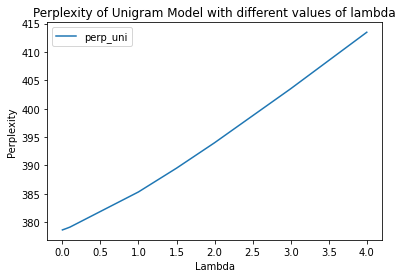

In [60]:
# plotting the graph for different values of lambda 
# and their respective perplexity for unigram model

df.plot(x='lambda', y='perp_uni', xlabel= 'Lambda', ylabel = 'Perplexity'
      , title = "Perplexity of Unigram Model with different values of lambda")

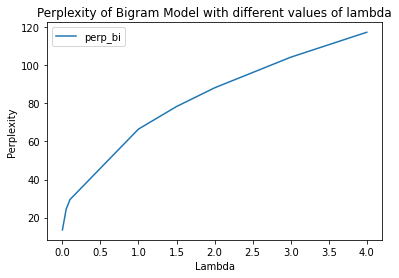

In [61]:
# plotting the graph for different values of lambda 
# and their respective perplexity for bigram model

df.plot(x='lambda', y='perp_bi', xlabel= 'Lambda', ylabel = 'Perplexity'
      , title = "Perplexity of Bigram Model with different values of lambda")

**(c) Pick the best lambda value(s) and train again your unigram and bigram models on training  data + developing data. Report new perplexity of your unigram and bigram models on the test data.**

We will consider lambda value as 0.001 for Unigram model and Bigram model.


In [62]:
# merge the training and validation data
d_trn_val = dataset[0:45873]

# Total no.of tokens in dataset for unigram calculation
tok_trn_val = list(itertools.chain.from_iterable(d_trn_val))
tot_tok_trn_val = len(tok_trn_val)
print("Total corpus for training + validation data before preprocessing : ", tot_tok_trn_val)

#Preprocess data
d_trnval_pre = preprocess_data(d_trn_val)
data_trn_val = list(itertools.chain.from_iterable(d_trnval_pre))

#Vocabulary size
dtrnval_vocab = vocab(d_trn_val)
dtrnval_vocab_size = len(dtrnval_vocab)
print("Vocabulary Size of training + validation data: ", dtrnval_vocab_size)


Total corpus for training + validation data before preprocessing :  979662
No of sentences in Corpus: 45873
Vocabulary Size of training + validation data:  44143


In [63]:
# Unigram and Bigram frequencies for new dataset
nds_unigram_freq = cal_unique_freq(d_trnval_pre)
nds_bigram_freq = cal_bigram_freq(d_trnval_pre)
#bigram_unique_word_count_nds = len(nds_unigram_freq)

#Bigrams for new dataset
bigrams_trnval = list(zip(*[data_trn_val[i:] for i in range(2)]))

No of unique words in corpus : 44143
No of words in corpus: 860874


In [64]:
#Calculating smoothened frequencies
suni_f = add_l_smoothing(0.001, nds_unigram_freq)
sbi_f = add_l_smoothing(0.001, nds_bigram_freq)

#Probablities for smoothened freq
suni_prob = cal_unigram_prob(suni_f, tot_tok_trn_val + 0.001 * dtrnval_vocab_size)
sbi_prob = cal_bigram_prob(sbi_f, nds_unigram_freq, 0.001* dtrnval_vocab_size, add_l=True)


#Perplexity of the model on validation data
suni_perp = perplexity(data_trn_val, suni_prob)
sbi_perp = perplexity(bigrams_trnval, sbi_prob)

In [65]:
print("Perplexity of unigram model with add-lambda smoothing with lambda value 0.001 : ",suni_perp )
print("Perplexity of bigram model with add-lambda smoothing with lambda value 0.001 : ",sbi_perp )

Perplexity of unigram model with add-lambda smoothing with lambda value 0.001 :  707.9696504676833
Perplexity of bigram model with add-lambda smoothing with lambda value 0.001 :  76.6541522375984


In [66]:
# Perplexity on test data for both models

#Perplexity of unigram test data
uni_test_perp = perplexity(d_tst, suni_prob)
print("Perplexity of unigram model on test data: ", uni_test_perp)

#Perplexity of bigrams test data
bi_val_perp = perplexity(bigrams_tst, sbi_prob)
print("Perplexity of bigram model on test data: ", bi_val_perp)

Perplexity of unigram model on test data:  370.5289096515584
Perplexity of bigram model on test data:  14.170457839076635


***Perplexity of unigram model on test data:  370.5289096515584***

***Perplexity of bigram model on test data:  14.170457839076635***

***Perplexity is lower with add-lambda smoothing than before.***

**(d) Generate random sentences based on the unigram and bigram language models from part(c). Report 5 sentences per model by sampling words from each model continuously until meeting the stop symbol <\s>.**

In [67]:
#Function to get the context and counter for ngram models
def get_context_counter(freq, n):
  context = {}
  ngram_counter = {}

  for ngram in freq.keys():
        if ngram in ngram_counter:
            ngram_counter[ngram] += 1.0
        else:
            ngram_counter[ngram] = 1.0
        if n == 2:
          prev_words, target_word = ngram
        elif n == 3:
          prev_words = ngram[0:2]
          target_word = ngram[2]
        if prev_words in context:
            context[prev_words].append(target_word)
        else:
            context[prev_words] = [target_word]
  return context, ngram_counter

In [100]:
#Given a context, function fetches the next word to append to a sequence
def random_token(word, prob, context, n):
  r = random.random()
  map_to_probs = {}
  if n > 2:
    token_of_interest = context[word] 
    for token in token_of_interest:
        ngram = word + (token,)
        map_to_probs[token] = prob.get(ngram)
  else:
    for i in word:
      token_of_interest = context[i] 
      given_word = i
    for token in token_of_interest:
        map_to_probs[token] = prob.get((given_word, token))

  summ = 0
  for token in sorted(map_to_probs):
        summ += map_to_probs[token]
        if summ > r:
            return token
  return '</s>'

In [69]:
#Generate a sentence with token_count = number of words
def generate_text(n, prob, context):
  context_queue = (n-1) * ['<s>']
  result = []
  obj = ""
  while obj != '</s>':
      if n > 2:
        obj = random_token(tuple(context_queue), prob, context, n)
      else:
        obj = random_token(context_queue, prob, context, n)
      if (obj != '</s>' and obj != '<s>'):
        result.append(obj)
      if n > 1:
          context_queue.pop(0)
          #if obj == '</s>':
          #    context_queue = (n - 1) * ['<s>']
          #else:
          context_queue.append(obj)
  return ' '.join(result)

In [101]:
#Generate 5 sentences for bigram
context_sbi, counter_sbi = get_context_counter(sbi_f, 2)

for i in range(0,5):
  sentence = generate_text(2, sbi_prob, context_sbi)
  print(i," : ", sentence)


0  :  mickey went to those who protected
1  :  i could possess
2  :  gun
3  :  i have passed until
4  :  it in helena


In [71]:
# For Unigram

def next(dict):
    total = 0
    for key, value in dict.items():
        total += float(value)
    random_probability = random.uniform(0, total)       # create random number
    temp = 0
    for word, probability in dict.items():
        if temp + float(probability) > random_probability: # When you reach the random number take the word.
            return word
        temp += float(probability)  

def generate_sent_uni(dict):
    sentence =[]
    generated_word = ''
    while (generated_word != '</s>' and generated_word != '<s>'):
      generated_word = next(dict)
      if (generated_word != '</s>' and generated_word != '<s>'):
        sentence.append(generated_word)
    
    return ' '.join(sentence)


In [75]:
#Generate 5 sentences for unigram
for i in range(0,5):
  sentence = generate_sent_uni(suni_prob)
  print(i," : ", sentence)


0  :  processors
1  :  september to tumbled to the seem to to it his this
2  :  which he
3  :  beyond fairway gathered unripe like eight 9 only holiday was extensive of
4  :  still next other


**(e) Choose at least one additional extension to implement. The available options are tri-gram, Good-Turing smoothing, interpolation method, and creative handling of unknownwords. Verify quantitative improvement by measuring 1) the perplexity on test data; andqualitative improvement by retrying 2) the random sentence generation in part (d).**

We chose to implement the **trigram model** as an extension.

In [76]:
#Calculating the trigram frequencies of set of words
def cal_trigram_freq(lines):
    trigram_frequencies = dict()
    for sentence in lines:
        given_word = None
        prev_given_word = None
        for word in sentence:
            if prev_given_word != None:
              if given_word != None:
                  trigram_frequencies[(prev_given_word, given_word, word)] = trigram_frequencies.get((prev_given_word, given_word, word),0) + 1
                  prev_given_word = given_word
                  given_word = word
              else:
                  given_word = word
            else:
              prev_given_word = word  
    return trigram_frequencies

In [77]:
tri_f = cal_trigram_freq(d_trnval_pre)

In [78]:
#Calculating trigram probabilities
def cal_trigram_prob(tri_freq, bi_freq, denom = 0, smooth = False):   
  trigram_model = dict()
  for pair, count in tri_freq.items():
    bigram_pair = pair[0:2]
    if smooth:
      trigram_model[pair] = count / (bi_freq[bigram_pair] + denom)
      #trigram_model[pair] = count / bi_freq[bigram_pair]
    else:
      trigram_model[pair] = count / bi_freq[bigram_pair]
  sorted_z = sorted(trigram_model.items(), key=lambda kv: kv[1])
  sorted_model_trigram = collections.OrderedDict(sorted_z)
  return sorted_model_trigram

In [79]:
tri_prob = cal_trigram_prob(tri_f, nds_bigram_freq)

In [80]:
# Perplexity of Trigram model on training data
trigrams_trn = list(zip(*[data_trn_val[i:] for i in range(3)]))
tri_trn_perp = perplexity(trigrams_trn, tri_prob)
tri_trn_perp


5.190404218992427

In [81]:
# Perplexity of Trigram model on test data
trigrams_tst = list(zip(*[d_tst[i:] for i in range(3)]))
tri_tst_perp = perplexity(trigrams_tst, tri_prob)
tri_tst_perp

2.1930950498971473

Perplexity of Trigram model on Training Data : 5.190404218992427 \
Perplexity of Trigram model on Test Data: 2.1930950498971473

**Add-lambda Smoothing for Trigram Model**

In [82]:
#Checking for different values of lambda to get the best value where the perplexity is the lowest.
lamda = [0.001,0.05,0.1,1,1.5,2,3,4] 

sfreq_tri = dict()
df1 = pd.DataFrame(columns=['lambda', 'perp_tri'])

for l in lamda:
  #Calculating smoothened frequencies
  sfreq_tri = add_l_smoothing(l,tri_f)

  #Probablities for smoothened freq
  sf_tri_prob = cal_trigram_prob(sfreq_tri, nds_bigram_freq, l*dtrnval_vocab_size, smooth = True)

  #Perplexity of the model on validation data
  sf_tri_perp = perplexity(trigrams_trn, sf_tri_prob)

  #collecting lambda and perplexity values
  df1 = df1.append({'lambda': l ,'perp_tri': sf_tri_perp}, ignore_index=True)

In [83]:
df1

,lambda,perp_tri
0,0.001,36.057372
1,0.050,662.109225
2,0.100,1145.291467
3,1.000,5520.871187
4,1.500,6735.445538
5,2.000,7619.739674
6,3.000,8851.465872
7,4.000,9689.876795


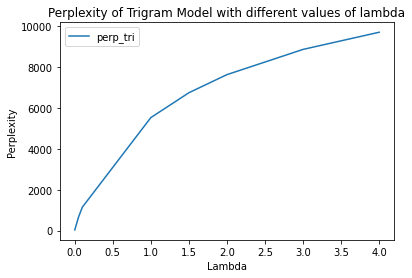

In [85]:
# plotting the graph for different values of lambda 
# and their respective perplexity for triigram model

df1.plot(x='lambda', y='perp_tri', xlabel= 'Lambda', ylabel = 'Perplexity'
          , title = "Perplexity of Trigram Model with different values of lambda")

Taking lambda as 0.001, training the model again

In [86]:
#Calculating smoothened frequencies
stri_f = add_l_smoothing(0.001,tri_f)

#Probablities for smoothened freq
stri_prob = cal_trigram_prob(stri_f, nds_bigram_freq, 0.001 * dtrnval_vocab_size, smooth=True)

#Perplexity of the model on training data
sf_tri_trn_perp = perplexity(trigrams_trn, stri_prob)
print("Perplexity of training data : ", sf_tri_trn_perp)

Perplexity of training data :  36.057372327142645


In [87]:
sf_tri_tst_perp = perplexity(trigrams_tst, stri_prob)
print("Perplexity of test data : ",tri_tst_perp)

Perplexity of test data :  2.1930950498971473


**Random Sentence generation by Trigram model**

In [102]:
#Generate 5 sentences for trigram
context_stri, counter_stri = get_context_counter(stri_f, 3)

for i in range(0,5):
  sentence = generate_text(3, stri_prob, context_stri)
  print(i," : ", sentence)


0  :  they range
1  :  the recently appointed to
2  :  then he
3  :  i dont know
4  :  you may save valuable
